- Temperature: temp, tempmin, tempmax

- Humidity/Dew: humidity, dew

- Pressure: sealevelpressure

- Wind: windspeed, windgust, winddir

- Cloud Cover: cloudcover

- Visibility: visibility

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')


df = pd.read_csv("../data/interim/cleaned.csv") 
print("Shape:", df.shape)
df.head()


Shape: (5702, 18)


,tempmax,tempmin,temp,dew,humidity,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,day,month,year
0,26.4,14.5,20.7,10.8,54.6,0.0,0.0,0.0,0,19.1,14.4,83.8,1014.4,1.6,4.0,1,1,2010
1,30.1,16.0,22.3,11.0,50.5,0.0,0.0,0.0,0,19.1,12.2,89.6,1015.1,0.7,4.0,2,1,2010
2,30.7,17.9,23.6,13.3,53.8,0.0,0.0,0.0,0,19.1,10.8,53.7,1015.0,17.8,4.0,3,1,2010
3,29.0,18.3,23.1,16.1,66.2,0.0,0.0,0.0,0,19.1,10.1,348.6,1014.4,25.0,4.0,4,1,2010
4,27.1,14.4,20.4,12.8,64.2,0.0,0.0,0.0,0,19.1,8.3,57.9,1012.9,0.0,4.0,5,1,2010


In [3]:
print("\nDataset Info:")
df.info()

print("\nSummary Statistics:")
df.describe().T



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5702 entries, 0 to 5701
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tempmax           5702 non-null   float64
 1   tempmin           5702 non-null   float64
 2   temp              5702 non-null   float64
 3   dew               5702 non-null   float64
 4   humidity          5702 non-null   float64
 5   precip            5702 non-null   float64
 6   precipprob        5702 non-null   float64
 7   precipcover       5702 non-null   float64
 8   preciptype        5702 non-null   int64  
 9   windgust          5702 non-null   float64
 10  windspeed         5702 non-null   float64
 11  winddir           5702 non-null   float64
 12  sealevelpressure  5702 non-null   float64
 13  cloudcover        5702 non-null   float64
 14  visibility        5702 non-null   float64
 15  day               5702 non-null   int64  
 16  month             5702 non-

,count,mean,std,min,25%,50%,75%,max
tempmax,5702.0,33.647404,4.588435,20.8,30.300,32.70,36.90,45.8
tempmin,5702.0,21.928639,5.050889,7.4,17.900,23.70,25.60,32.1
temp,5702.0,27.291056,4.411821,15.9,24.225,27.30,30.20,38.8
dew,5702.0,17.779709,5.088174,1.3,13.500,17.60,22.90,26.0
humidity,5702.0,60.600631,17.180040,19.4,47.325,61.65,75.00,95.1
precip,5702.0,2.361855,8.300978,0.0,0.000,0.00,0.80,198.0
precipprob,5702.0,38.482094,48.607493,0.0,0.000,0.00,100.00,100.0
precipcover,5702.0,14.629763,26.198091,0.0,0.000,0.00,20.83,100.0
preciptype,5702.0,0.389337,0.487643,0.0,0.000,0.00,1.00,1.0
windgust,5702.0,26.113907,9.267085,11.9,19.100,23.40,31.60,71.6


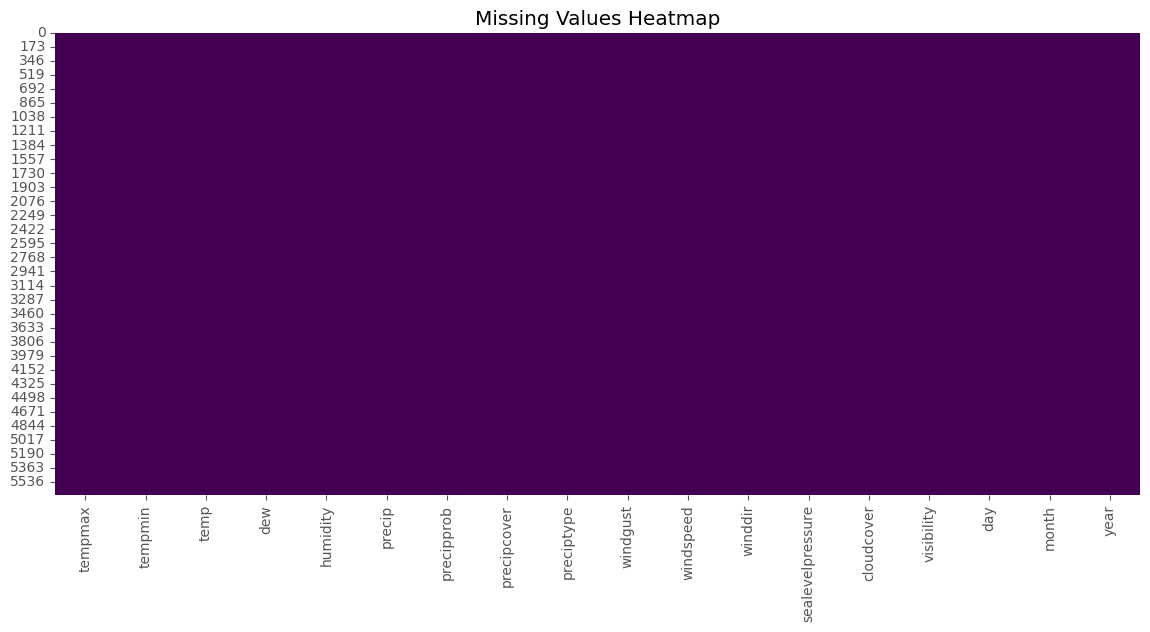

tempmax             0
tempmin             0
temp                0
dew                 0
humidity            0
precip              0
precipprob          0
precipcover         0
preciptype          0
windgust            0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
visibility          0
day                 0
month               0
year                0
dtype: int64

In [5]:
plt.figure(figsize=(14,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

df.isnull().sum()


In [6]:
cat_cols = ['preciptype']
for c in cat_cols:
    print(f"\nValue counts for {c}:")
    print(df[c].value_counts())



Value counts for preciptype:
preciptype
0    3482
1    2220
Name: count, dtype: int64


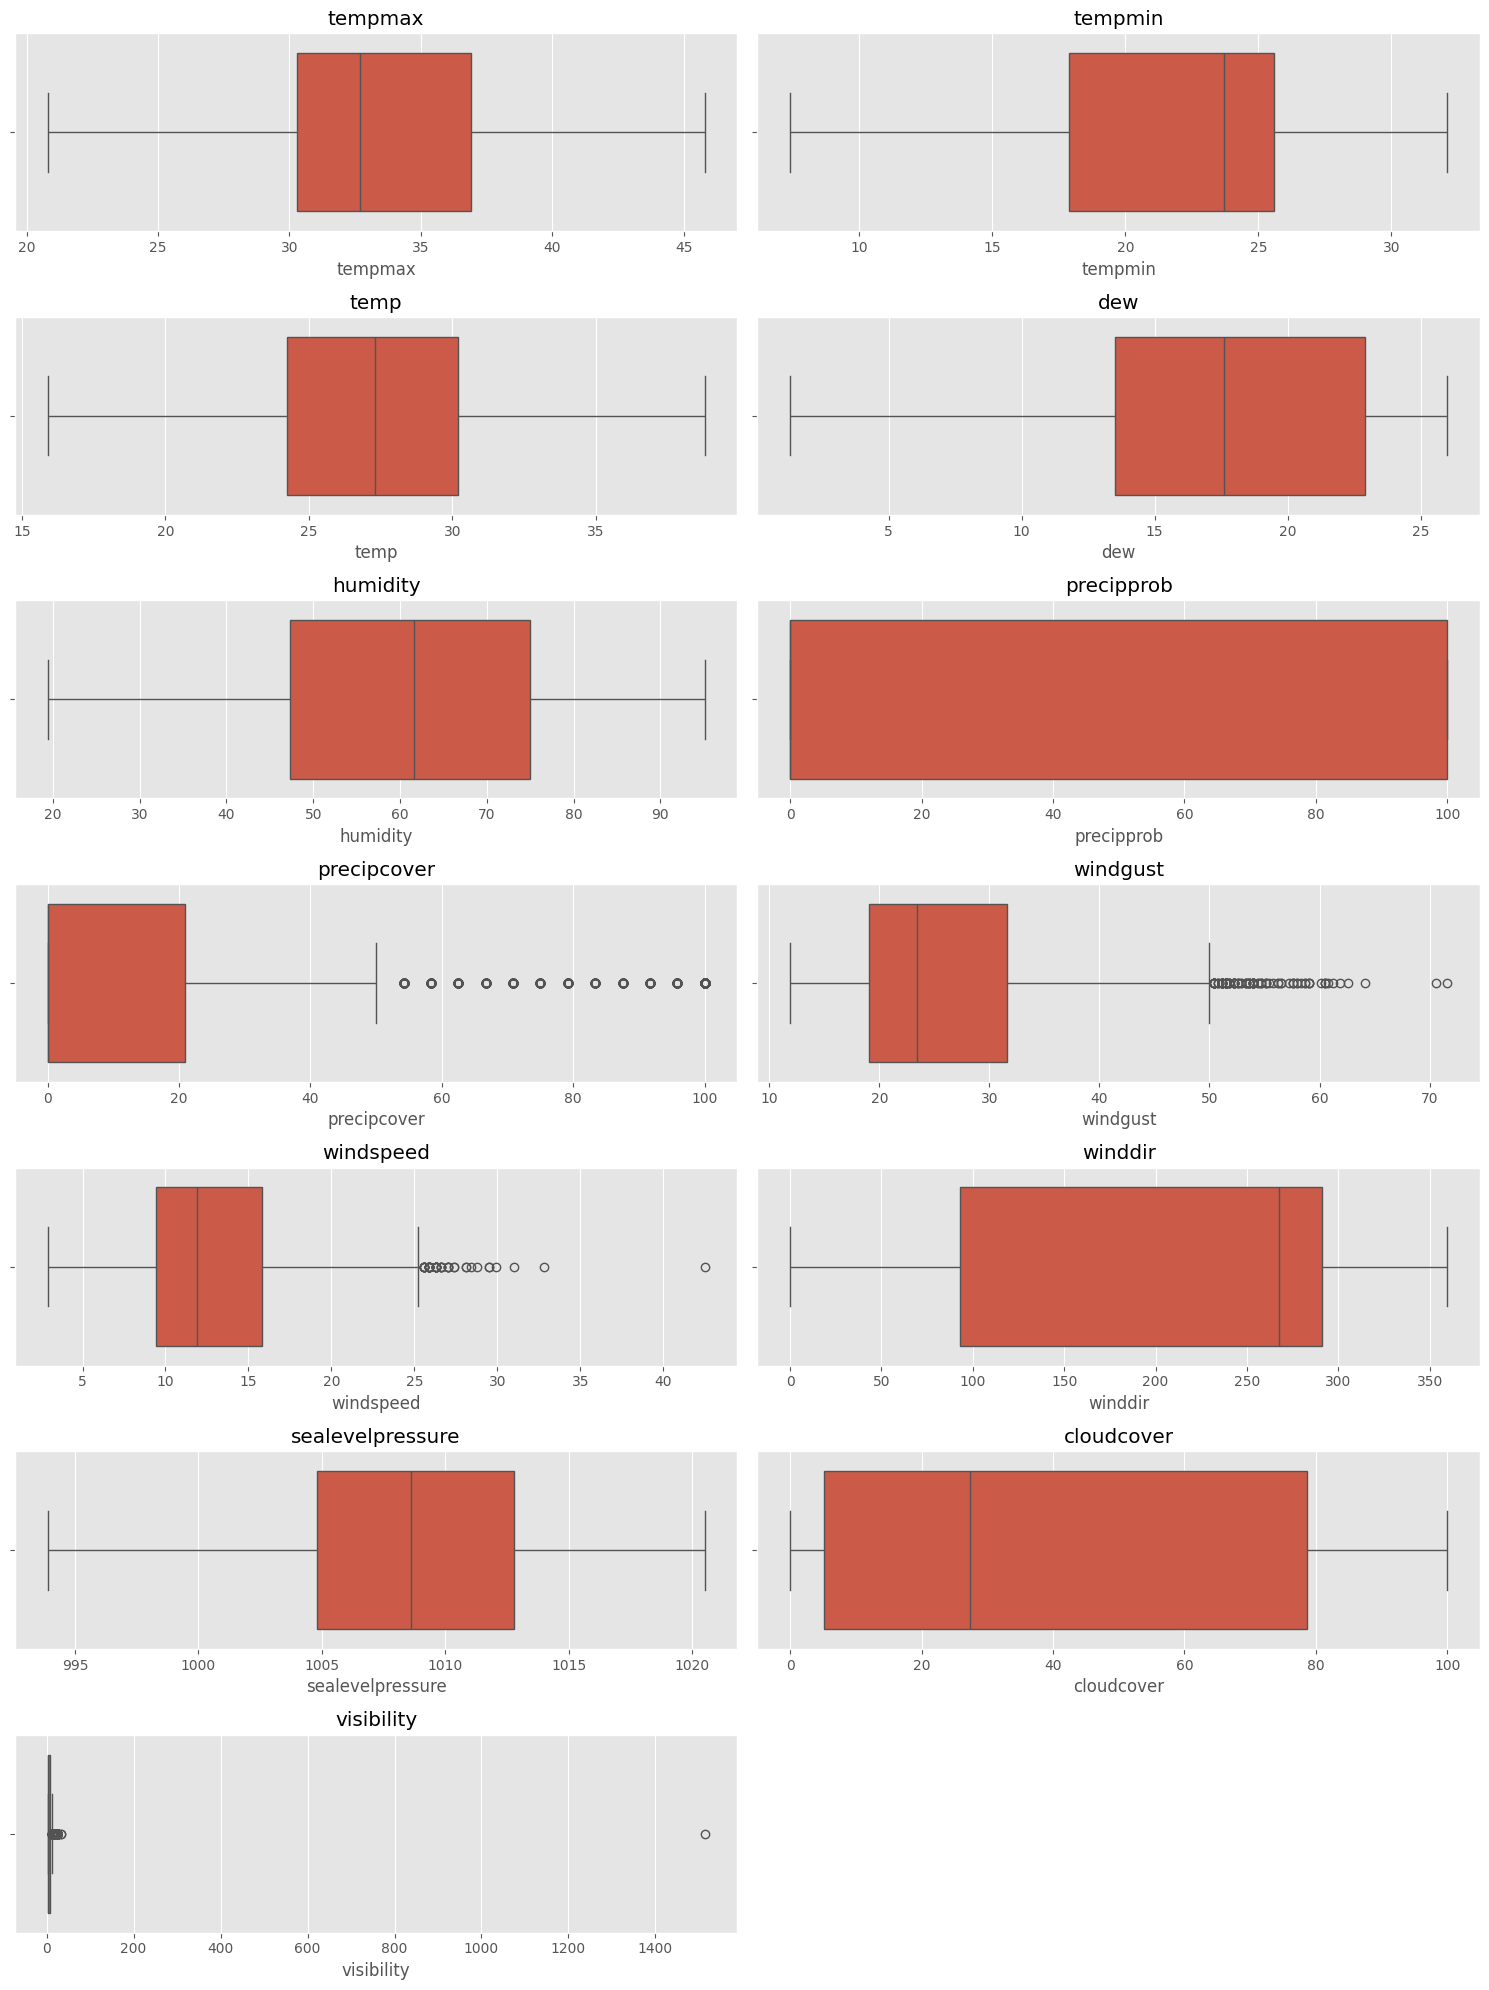

In [7]:
num_cols = ['tempmax','tempmin','temp','dew','humidity','precipprob','precipcover',
            'windgust','windspeed','winddir','sealevelpressure','cloudcover','visibility']

plt.figure(figsize=(15,20))
for i, col in enumerate(num_cols, 1):
    plt.subplot(7,2,i)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


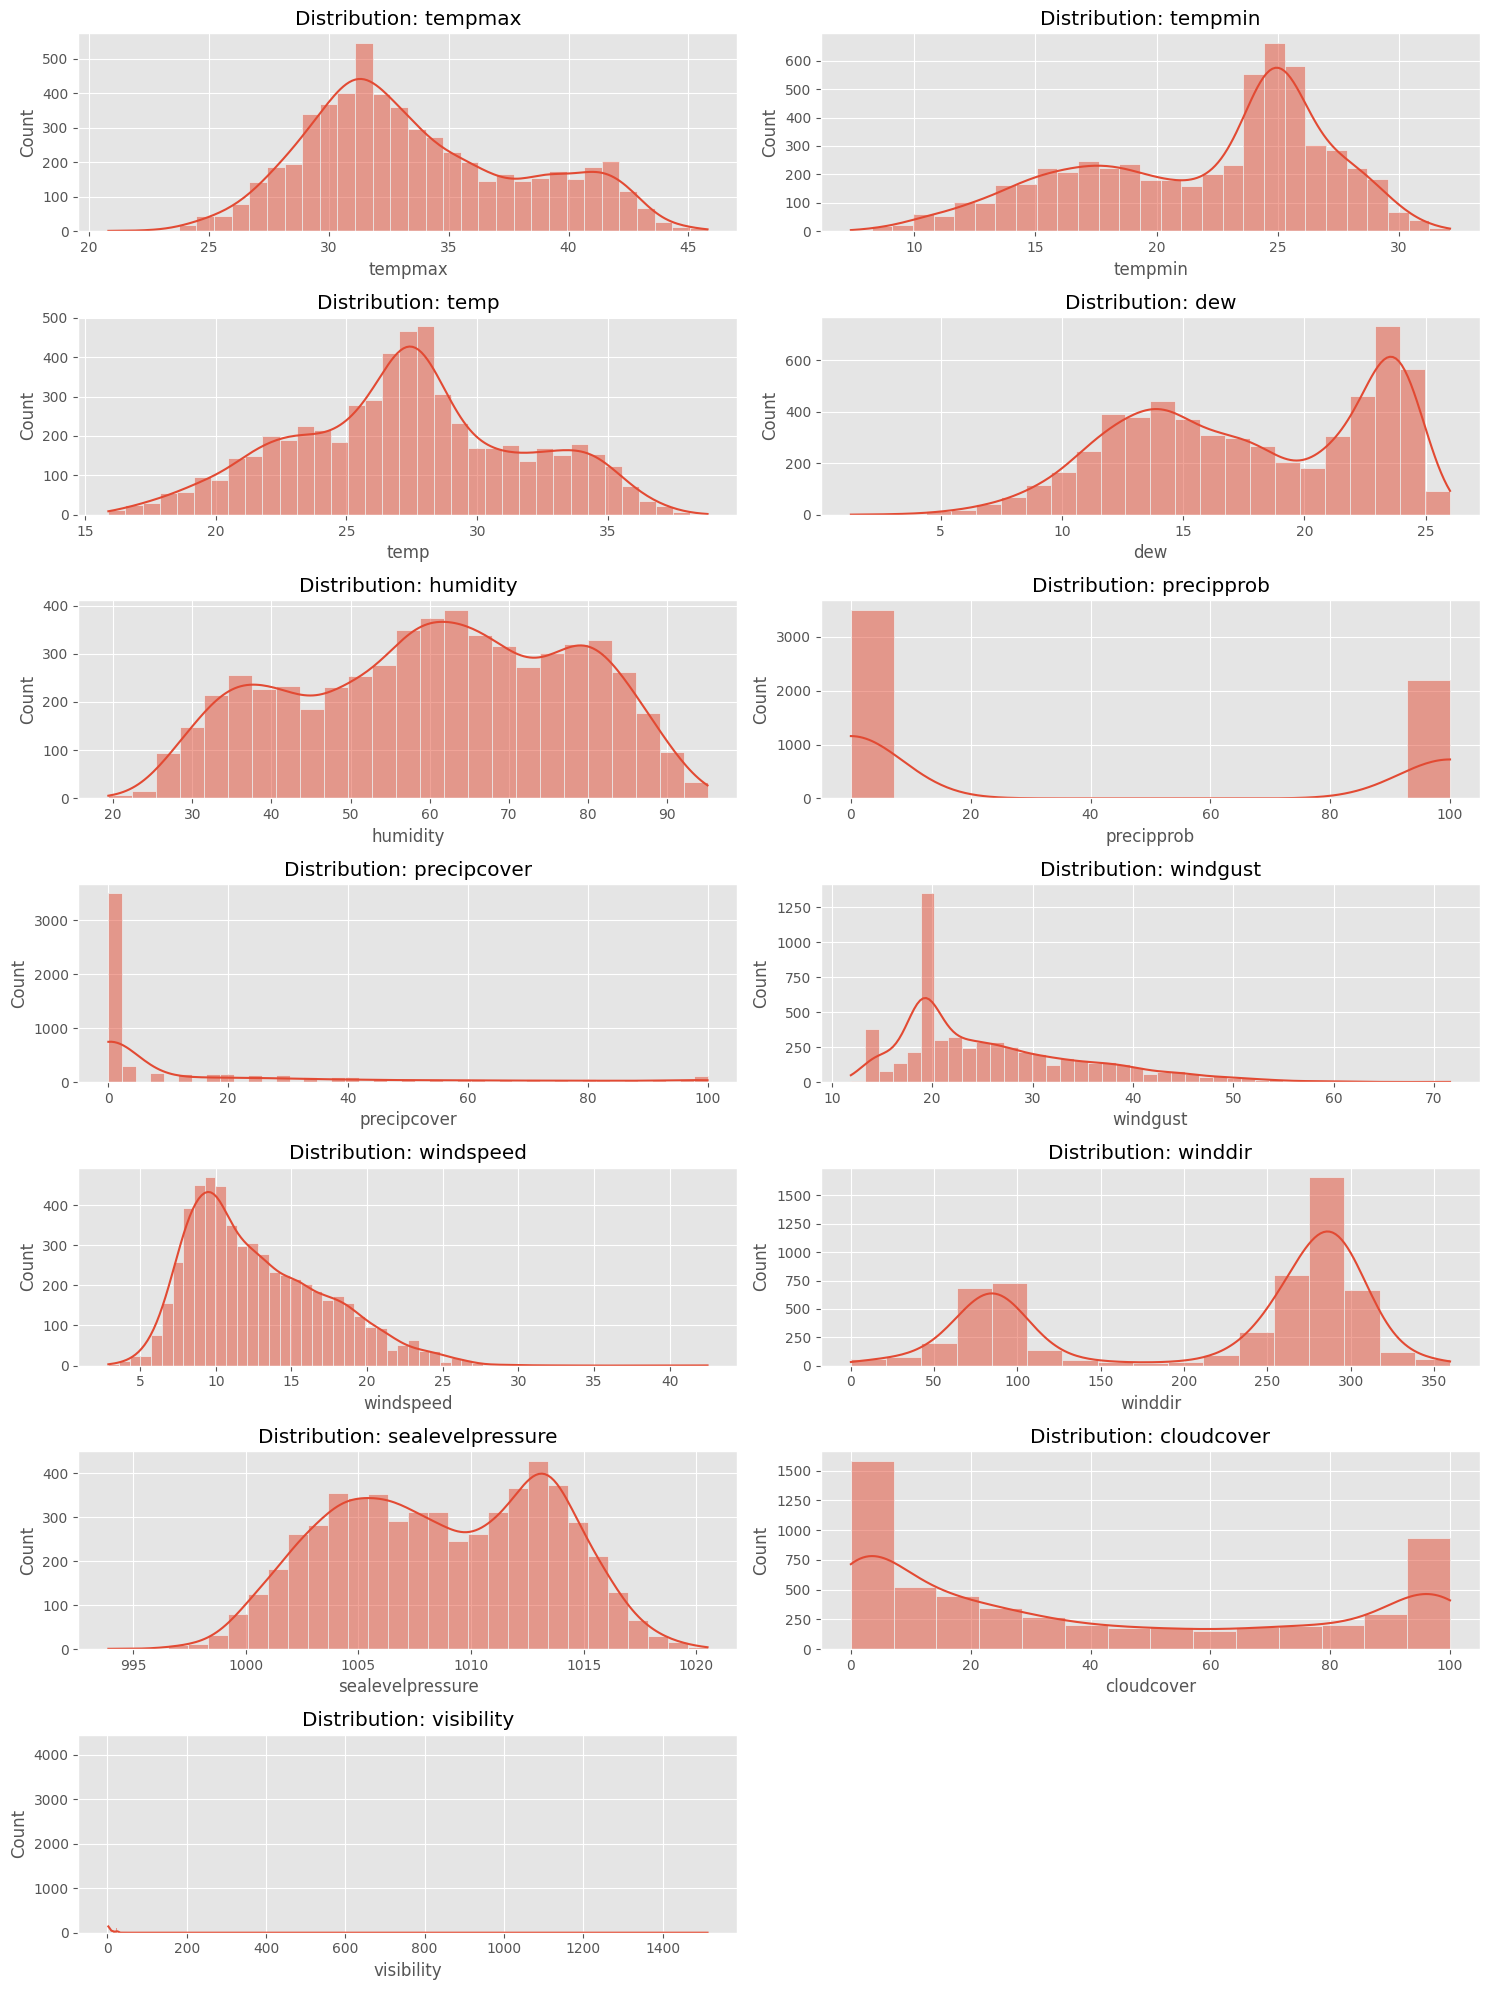

In [8]:
plt.figure(figsize=(15,20))
for i, col in enumerate(num_cols, 1):
    plt.subplot(7,2,i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution: {col}")

plt.tight_layout()
plt.show()


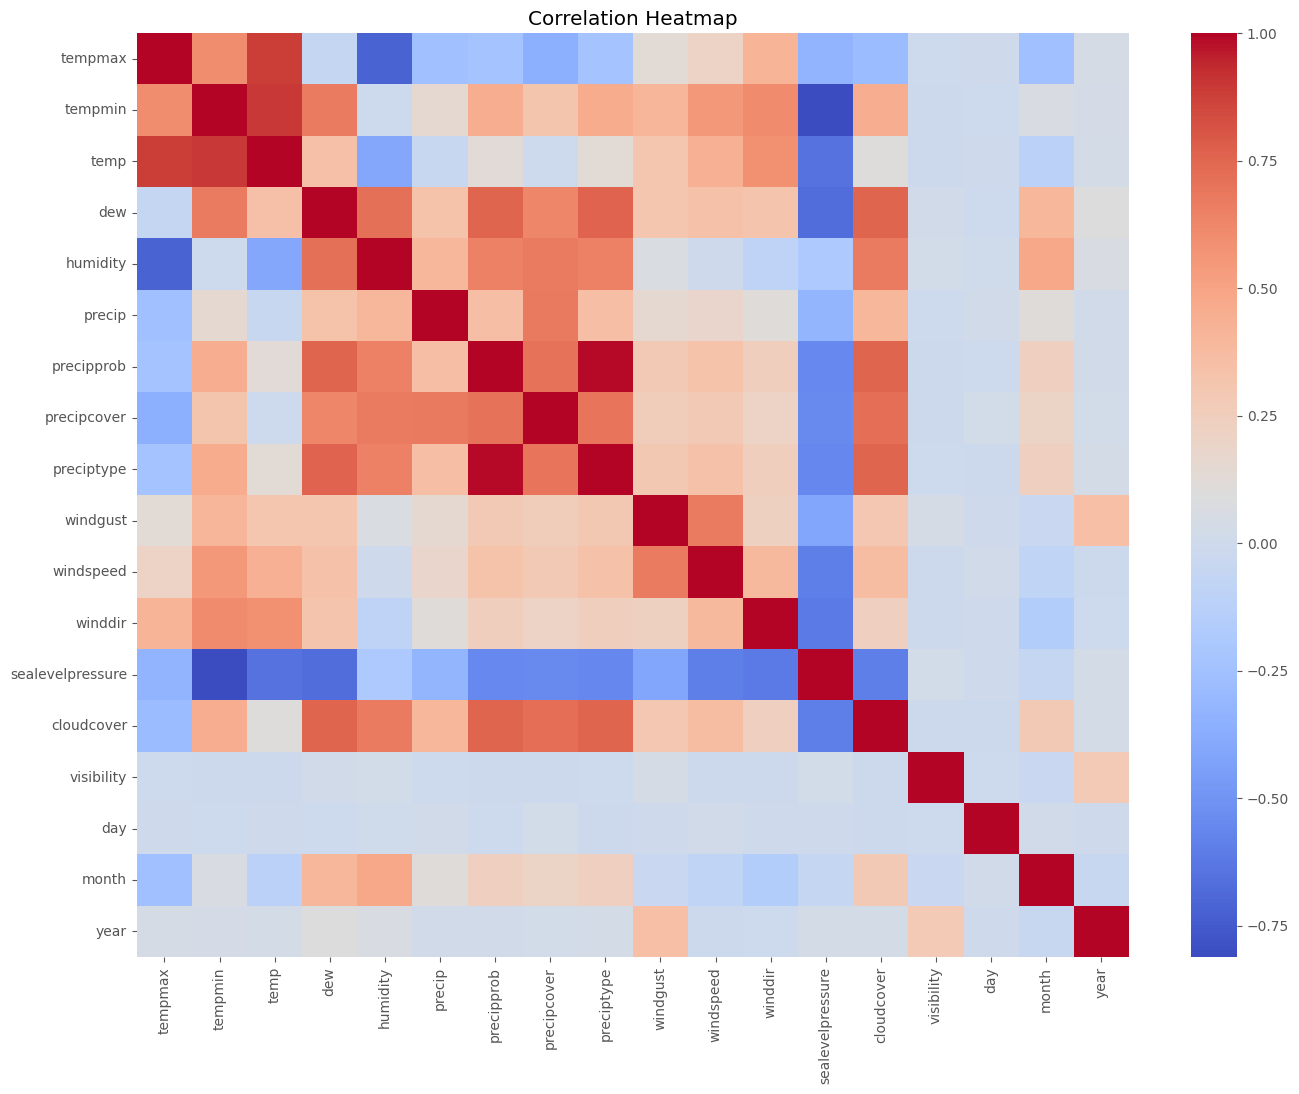

precip              1.000000
precipcover         0.677190
cloudcover          0.404948
humidity            0.402863
precipprob          0.359814
preciptype          0.356131
dew                 0.332165
windspeed           0.182877
windgust            0.157652
tempmin             0.152992
winddir             0.113506
month               0.109579
day                 0.015304
year                0.012880
visibility         -0.008517
temp               -0.043575
tempmax            -0.253175
sealevelpressure   -0.327121
Name: precip, dtype: float64

In [9]:
plt.figure(figsize=(16,12))
corr = df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

corr['precip'].sort_values(ascending=False)


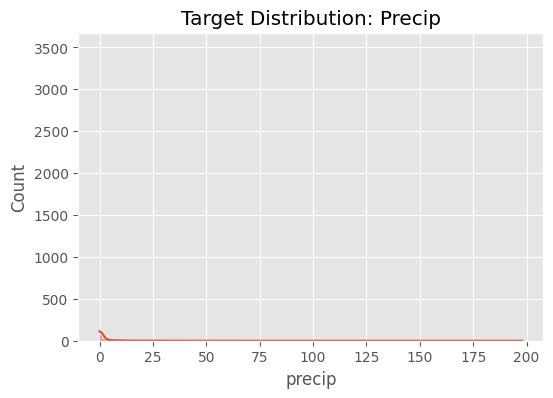

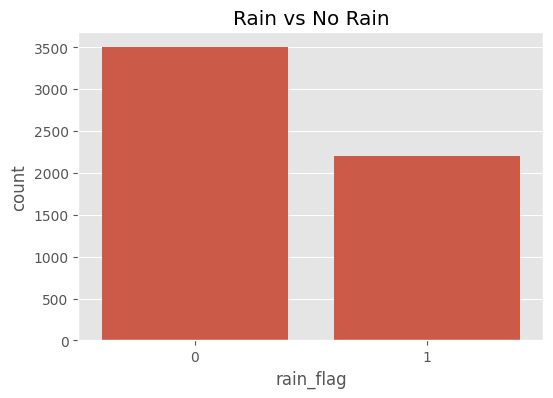

rain_flag
0    0.61382
1    0.38618
Name: proportion, dtype: float64

In [10]:
plt.figure(figsize=(6,4))
sns.histplot(df['precip'], kde=True)
plt.title("Target Distribution: Precip")
plt.show()

# Rain vs No Rain
df['rain_flag'] = (df['precip'] > 0).astype(int)

plt.figure(figsize=(6,4))
sns.countplot(x=df['rain_flag'])
plt.title("Rain vs No Rain")
plt.show()

df['rain_flag'].value_counts(normalize=True)


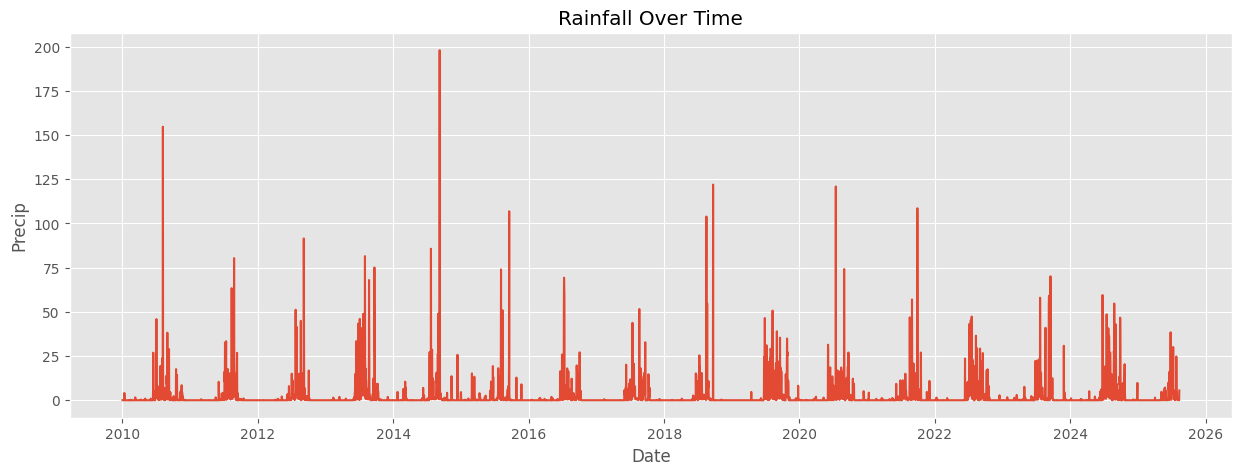

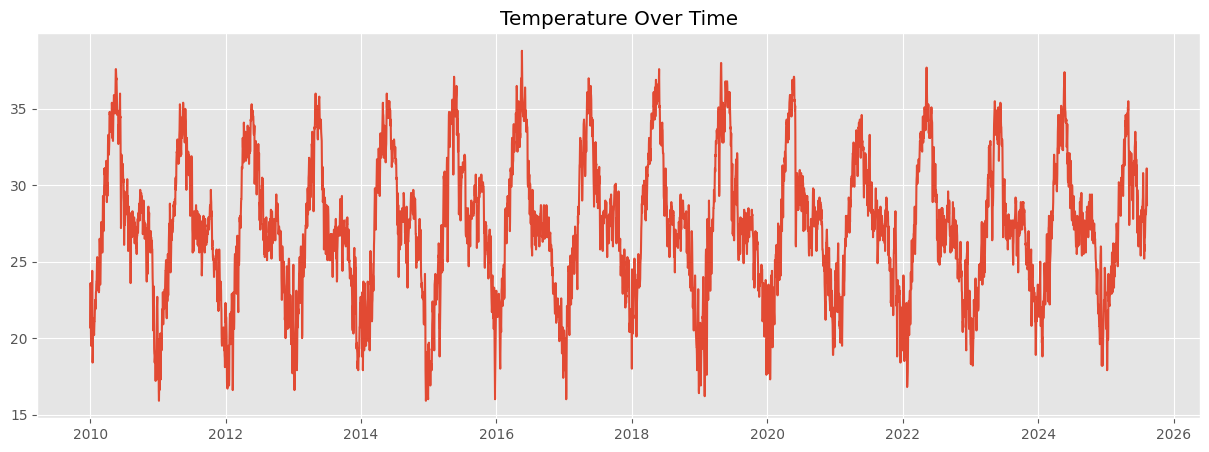

In [11]:
df['date'] = pd.to_datetime(df[['year','month','day']])

plt.figure(figsize=(15,5))
plt.plot(df['date'], df['precip'])
plt.title("Rainfall Over Time")
plt.xlabel("Date")
plt.ylabel("Precip")
plt.show()

plt.figure(figsize=(15,5))
plt.plot(df['date'], df['temp'])
plt.title("Temperature Over Time")
plt.show()


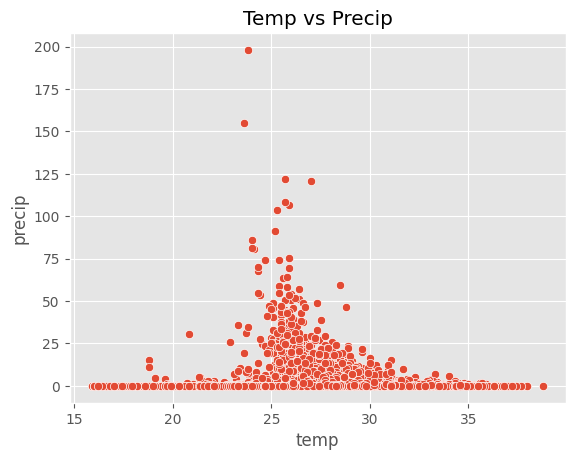

In [12]:
sns.scatterplot(data=df, x='temp', y='precip')
plt.title("Temp vs Precip")
plt.show()


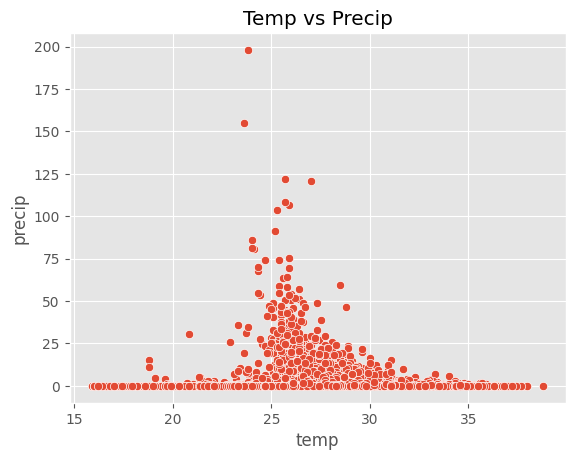

In [13]:
sns.scatterplot(data=df, x='temp', y='precip')
plt.title("Temp vs Precip")
plt.show()


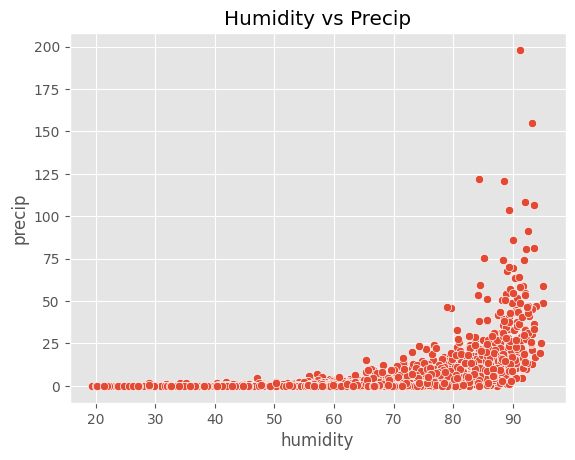

In [14]:
sns.scatterplot(data=df, x='humidity', y='precip')
plt.title("Humidity vs Precip")
plt.show()


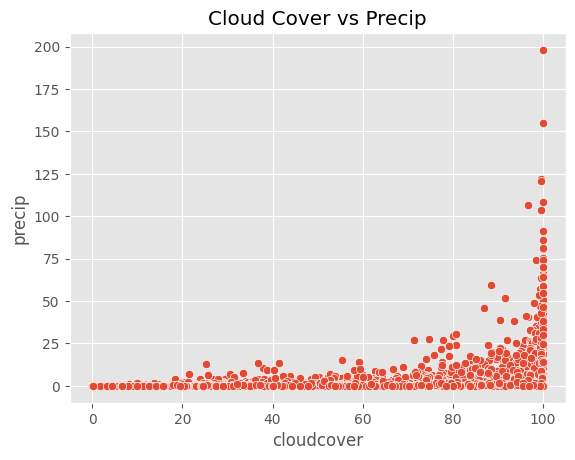

In [15]:
sns.scatterplot(data=df, x='cloudcover', y='precip')
plt.title("Cloud Cover vs Precip")
plt.show()


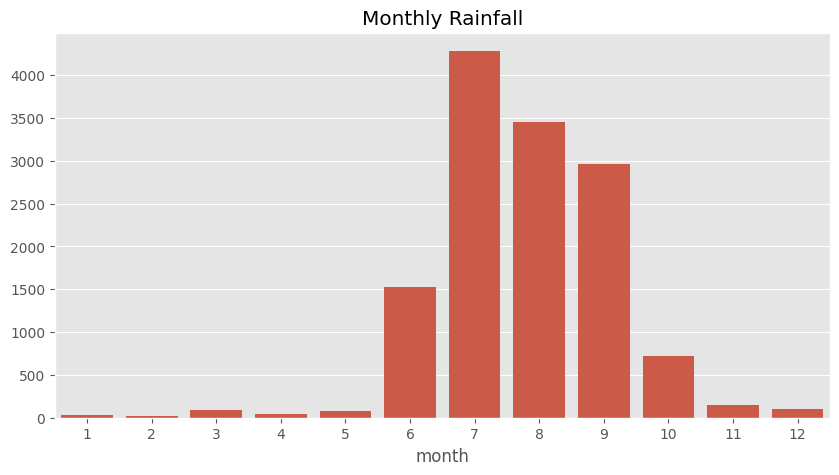

In [16]:
monthly = df.groupby('month')['precip'].sum()

plt.figure(figsize=(10,5))
sns.barplot(x=monthly.index, y=monthly.values)
plt.title("Monthly Rainfall")
plt.show()
